# Abwärme nutzen

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.sankey import Sankey
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import os.path
import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
platform 1.0.8
Image 8.3.1
requests 2.26.0
scipy 1.7.1


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)
    #plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> Abwärmenutzung bewerten </li>
        <li> mit Zahlenbeispielen </li>
        <li> um Potenziale in anderen Umfeldern zu ermitteln </li>
    </ul>
</div>

## Nutzbare Energie

aus der Physik: **Energie =die Menge an Arbeit, die ein physikalisches System verrichten kann**

**Energieerhaltung: Energie kann weder verbraucht, noch erzeugt werden.**

## Abwärme von Rechenzentren nutzen

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><i>Beispiel</i></div>
Rechenzentrum mit mittlerem elektrischem Leistungsbedarf von<br>
$+2$ MW<br>
$-0$ MW Kühlanlagen <br>
$-0$ MW Wärme der gefertigten Produkte (gibts keine)<br>
$=+2$ MW elektrische Heizung
</div>

$\to$ Winter: weniger Heizwärme nötig, Sommer: Temperaturen am Arbeitsplatz von über 40°C

Zahlenbeispiel: 1,6 MW Abwärme des Supercomputers am Forschungszentrum in Jülich

*Beispiel: Quartiersversorgung in Frankfurt mit Rechenzentrums-Abwärme* {cite:p}`ulrike_schulz_innovatives_2021`

- 1300 Neubauwohnungen bzw. Gewerbeeinheiten

- Jahresbedarf 4000 MWh zu 60% aus Rechenzentrums-Abwärme versorgen

In [3]:
consumption = 4000 # MWh
wasteheat = 0.6
print('ca.', str(wasteheat*consumption), 'MWh aus Abwärme')

ca. 2400.0 MWh aus Abwärme


- 40% aus Fernwärme (Heizkraftwerke der Mainova)

- Einsparung von 400 t CO$_2$ lt. Unternehmensberechnungen

- Contracting: 15 Jahre Vertragslaufzeit

- Länge der Abwärmeleitung vom Rechenzentrum zum Quartier ca. 500 m

- Ausbau der Fernwärmeleitung ca. 260 Meter

- zudem 580 Meter Nahwärmenetz

- 2 Großwärmepumpen zu je 320 kWh$_{\text{th}}$: 30°C Abwärme auf 70°C Vorlauftemperatur heben

- Fernwärme-Übergabestation mit 3210 kWh$_{\text{th}}$, Pufferspeicher, Peripherie und Steuerung

## Wärme wandeln

maximal in Arbeit umwandelbarer Teil der Wärme {cite:p}`hesselbach_energie-_2012`:
\begin{equation}
\vert W \vert_{\text{max}} = \left(1-\frac{T_{\text{Umgebung}}}{T_{\text{Arbeitsstoff}}}\right)\cdot Q_{\text{Arbeitsstoff}}   
\end{equation}

*Beispiel*: Dampftemperatur von 600°C, Kühlwassertemperatur von 10°C ergibt $\eta_{\text{max}}=68\%$, weitere Verluste führen zu $\eta_{\text{real}} = 35-45\%$ bei Kohlekraftwerken {cite:p}`hesselbach_energie-_2012`

Konsequenzen:
1. Wärme zu Strom wandeln: technologisch begrenzt ca. $\eta_{\text{max}} = 50\%$
2. $\eta\uparrow$ durch $T_{\text{Arbeitsstoff}}\uparrow$, begrenzt durch Werkstoffe und Alterungsprobleme
3. je höher $T_{\text{Umgebung}}$ bzw. $T_{\text{Kühlwasser}}$, desto $\eta\downarrow$

## Abwärme im Haushalt nutzen

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><i>Beispiel</i></div>
Überschüssige Wärme aus Solarthermie wird für den Waschmaschinen-Einlauf genutzt. Dadurch reduziert sich der elektrische Energiebedarf für den Waschgang.
</div>

Annahme: Die Solarthermieanlage hat folgende Kennwerte:
- Massenstrom $\dot{m}_{st}$
- spezifische Wärmekapazität $c_{st}$

In [4]:
m_st = 20 # Massenstrom [kg/h]
c_st = 2.2 # spezifische Wärmekapazität [kj/(kg*K)]

Annahme: Die Waschmaschine verhält sich folgendermaßen:
- Umwandlungswirkungsgrad Elektrizität zu thermischer Energie $\eta_{heat}$
- Dauer des Aufheizvorgangs $t_{heat}$

In [6]:
eta_heat = 0.85 # Wirkungsgrad, mit dem elektrische in thermische Energie beim Heizen umgewandelt wird
# ähnlich Wasserkocher, inkl. thermischer Verluste (Schätzwert)
t_heat = 2 # Dauer des Aufheizvorgangs [h]

Die Temperatur des von der Solarthermie-Anlage abgegebenen Wassers könnte den folgenden Verlauf haben (fiktive Werte). Für die Tagestemperatur (Umgebungstemperatur) wird in erster Näherung ein konstanter Wert (im Bad scheint wenig Sonne) angenommen.

<AxesSubplot:>

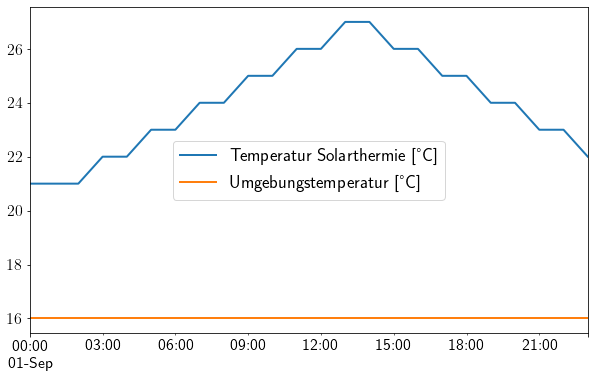

In [12]:
# Zeitreihe für Temperatur von Solarthermie, nachdem schon Wärme zu Heizzwecken etc. abgeführt
# worden ist (fiktive Werte)
data_st = pd.DataFrame(data=[21,21,21,22,22,23,23,24,24,25,25,26,26,27,27,26,26,25,25,24,24,23,23,22],
                        index=pd.date_range(start='2020-09-01 00:00:00', end='2020-09-01 23:00:00', periods=24),
                        columns=['Temperatur Solarthermie [°C]'])

# Zeitreihe für Temperatur der Umgebung (fiktive Werte)
data_st['Umgebungstemperatur [°C]'] = [16 for _ in range(24)]
data_st.plot()

Der nutzbare Anteil des Wärmestroms $\dot{Q}_{Ex}$ ergibt sich nun

- [ ] HIER IST eine GLEICHUNG (1) verlinkt und die Einheit von der folgenden Berechnung macht keinen Sinn!! Bitte nochmal richtig machen

```{bibliography}
:filter: docname in docnames
```